In [2]:
import pandas as pd
import numpy as np



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\sartyaki\Desktop\my model\titanic.csv")

In [5]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [11]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [12]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [13]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()

In [14]:
df1=df.copy()

In [15]:
df1.shape

(891, 5)

In [16]:
df1['Sex']=label1.fit_transform(df1['Sex'])

In [17]:
df1.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


C:\Users\sartyaki\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\sartyaki\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\sartyaki\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\sartyaki\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x2bb3c221640>,
 'caps': [<matplotlib.lines.Line2D at 0x2bb3c221ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bb3c2213a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bb3c10d460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bb3c3cdf70>],
 'means': []}

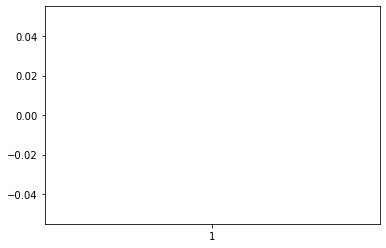

In [18]:
plt.boxplot(df1['Age'])

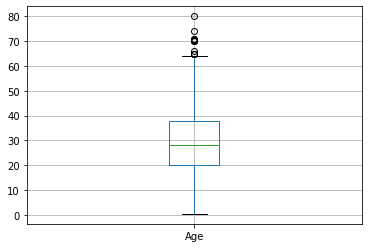

In [19]:
df1.boxplot(column='Age')

In [20]:
df1=df1[df1['Age']<=65]

In [21]:
df1.shape

(706, 5)

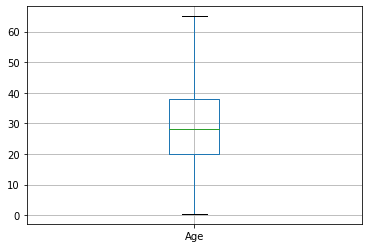

In [22]:
df1.boxplot(column='Age')

In [23]:
df1['Age'].isnull().sum()

0

In [25]:
df1.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

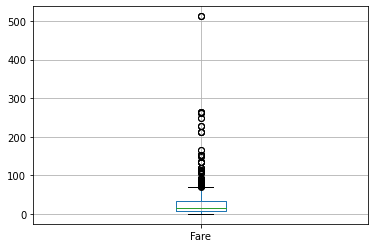

In [26]:
df1.boxplot(column='Fare')

In [31]:
df1['Fare'].mode()

0    13.0
dtype: float64

In [35]:
df1=df1[df1['Fare']<70]

In [36]:
df1.shape

(96, 5)

In [37]:
df.shape

(891, 5)

In [38]:
df2=df.copy()

In [39]:
df2=df2[df2['Age']<=65]

In [40]:
df2=df2[df2['Fare']<70]

In [41]:
df2.shape

(610, 5)

In [48]:
df2.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
6,1,1,54.0,51.8625,0


In [44]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()

In [45]:
df2['Sex']=label1.fit_transform(df2['Sex'])

In [47]:
df2.shape

(610, 5)

In [56]:
target=pd.DataFrame(df2['Survived'])


In [52]:
inputs=df2.drop('Survived',axis='columns')

In [57]:
target.head()

,Survived
0,0
2,1
3,1
4,0
6,0


In [60]:
from sklearn.model_selection import train_test_split


In [90]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

In [91]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()

In [93]:
gauss.fit(x_train,y_train)

C:\Users\sartyaki\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [94]:
gauss.score(x_test,y_test)

0.7486338797814208

In [88]:
y_test[:10]

,Survived
838,1
819,0
112,0
408,0
710,1
628,0
800,0
847,0
122,0
207,1


In [95]:
gauss.predict(x_test[:10])

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [96]:
x_test.shape

(183, 4)

In [6]:
df.shape

(891, 12)

Krish titanic######

In [7]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
df.isnull()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
df.isnull().value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [11]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [12]:
import seaborn as sns

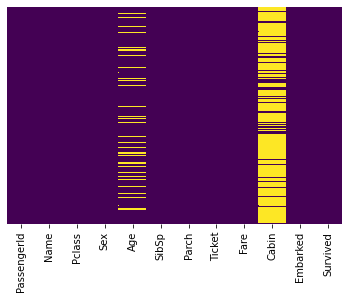

In [16]:
####to show the null values in a dataset we can use heatmap,here in yticklabels we are setting false as we do not want to show index 
####numbers in our visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

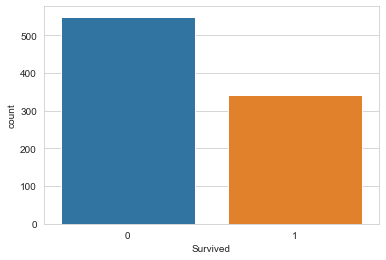

In [20]:
######to check how many survived or not it helps us to visualize is there any data imbalance or not
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

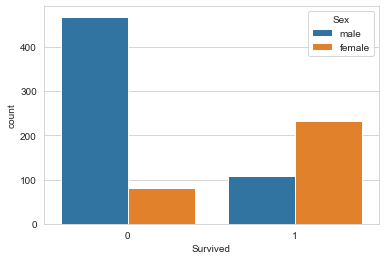

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

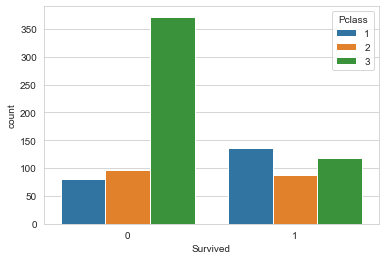

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

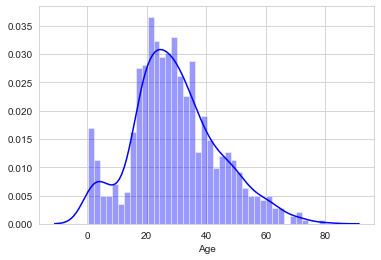

In [25]:
sns.distplot(df['Age'].dropna(),kde=True,color='blue',bins=40)

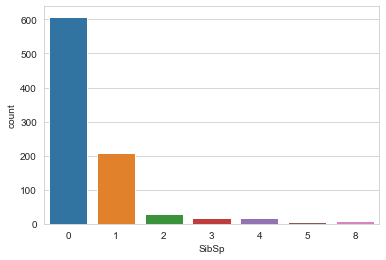

In [26]:
sns.countplot(x='SibSp',data=df)

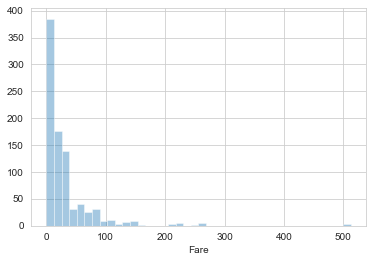

In [28]:
sns.distplot(df['Fare'],kde=False,bins=40)

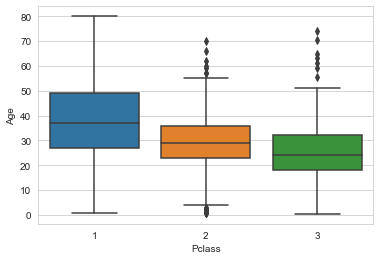

In [29]:
sns.boxplot(x=df['Pclass'],y=df['Age'])

In [30]:
tdf=df.copy()


In [31]:
tdf.shape

(891, 12)

In [45]:
def fun1(x):
    Age=x[0]
    Pclass=x[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    


In [46]:
tdf['Age']=tdf[['Age','Pclass']].apply(fun1,axis=1)

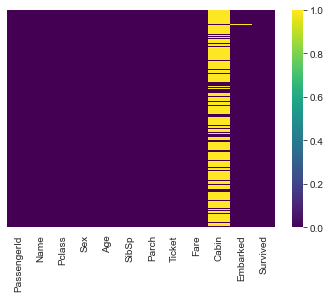

In [49]:
sns.heatmap(tdf.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [52]:
tdf.drop('Cabin',axis=1,inplace=True)

In [53]:
tdf.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,S,0


In [54]:
####Label encoder is labelling the values in binary code like here sex column 
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [55]:
tdf['Sex']=label.fit_transform(tdf['Sex'])

In [56]:
tdf.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,1,22.0,1,0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,S,1
4,5,"Allen, Mr. William Henry",3,1,35.0,0,0,373450,8.0500,S,0


In [68]:
####to count no of elements in a particular column
df.groupby('Embarked')['PassengerId'].nunique()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [59]:
tdf.isnull().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [60]:
tdf.drop

NameError: name 'drop' is not defined

In [69]:
tdf.isnull().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [70]:
which(is.na(tdf['Embarked']))

SyntaxError: invalid syntax (<ipython-input-70-ac24b409ce50>, line 1)

In [73]:
####find row no which has nana values in embarked column 
a=tdf.isnull().any(axis=1)

In [74]:
l=df[a]

In [79]:
l

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
61,62,"Icard, Miss. Amelie",1,female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,"Stone, Mrs. George Nelson (Martha Evelyn)",1,female,62.0,0,0,113572,80.0,B28,NaN,1


In [78]:
tdf.drop(829,)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,1,22.0,1,0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,S,1
4,5,"Allen, Mr. William Henry",3,1,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,1,27.0,0,0,211536,13.0000,S,0
887,888,"Graham, Miss. Margaret Edith",1,0,19.0,0,0,112053,30.0000,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,0,24.0,1,2,W./C. 6607,23.4500,S,0
889,890,"Behr, Mr. Karl Howell",1,1,26.0,0,0,111369,30.0000,C,1


In [84]:
tdf.drop(index=829)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,1,22.0,1,0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,S,1
4,5,"Allen, Mr. William Henry",3,1,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,1,27.0,0,0,211536,13.0000,S,0
887,888,"Graham, Miss. Margaret Edith",1,0,19.0,0,0,112053,30.0000,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,0,24.0,1,2,W./C. 6607,23.4500,S,0
889,890,"Behr, Mr. Karl Howell",1,1,26.0,0,0,111369,30.0000,C,1


In [85]:
tdf1=tdf.drop([61,829])

In [91]:
tdf1.shape

(889, 11)

In [87]:
df.drop([61,829],inplace=True)

In [98]:
tdf1.shape

(889, 11)

In [99]:
tdf1.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,1,1
2,3,"Heikkinen, Miss. Laina",3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,0,1
4,5,"Allen, Mr. William Henry",3,1,35.0,0,0,373450,8.0500,0,0


In [90]:
pd.get_dummies(tdf1['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [94]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

In [96]:
tdf1['Embarked']=lb.fit_transform(tdf1['Embarked'])

In [135]:
tdf_eda1.isnull().sum()

PassengerId    2
Name           2
Pclass         2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Embarked       2
Survived       2
C              4
Q              4
S              4
dtype: int64

In [122]:
tdf_eda1.drop([0,1],inplace=True)

In [104]:
label=lb.fit_transform(tdf['Embarked'])

In [105]:
label_result=pd.DataFrame(label,columns=lb.classes_)

In [111]:
label_result.head()

,C,Q,S
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1


In [125]:
tdf_eda1.shape

(889, 14)

In [126]:
tdf_eda1=pd.concat([tdf,label_result],axis=1)

In [136]:
tdf_eda1.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,C,Q,S
0,1.0,"Braund, Mr. Owen Harris",3.0,1.0,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0,NaN,NaN,NaN
1,2.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,0.0,38.0,1.0,0.0,PC 17599,71.2833,C,1.0,NaN,NaN,NaN
2,3.0,"Heikkinen, Miss. Laina",3.0,0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1.0,0.0,0.0,1.0
3,4.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,0.0,35.0,1.0,0.0,113803,53.1000,S,1.0,0.0,0.0,1.0
4,5.0,"Allen, Mr. William Henry",3.0,1.0,35.0,0.0,0.0,373450,8.0500,S,0.0,0.0,0.0,1.0


In [151]:
a=tdf_eda1.isnull().any(axis=1)

In [133]:
l=

In [134]:
l

,0
0,True
1,True
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,True


In [155]:
tdf_eda1.drop([61,829],inplace=True)

In [156]:
tdf_eda1.shape

(885, 14)

In [157]:
tdf_eda1.isnull().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
C              0
Q              0
S              0
dtype: int64

In [180]:
tdf_eda1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Survived
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,1.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0
5,3.0,1.0,24.0,0.0,0.0,8.4583,1.0,0.0,0.0
6,1.0,1.0,54.0,0.0,0.0,51.8625,0.0,1.0,0.0


In [160]:
######finding the row number which contains null values############
tdf_eda1[tdf_eda1['Embarked'].isnull()].index.tolist

<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

In [175]:
####drooping columns from a dataset #########
tdf_eda1.drop(['PassengerId'],axis=1,inplace=True)

In [176]:
tdf_eda1.shape

(885, 9)

In [178]:
tdf_eda1.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Q', 'S'], dtype='object')

In [179]:
column_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S','Survived']
tdf_eda1=tdf_eda1.reindex(columns=column_names)

In [210]:
######by test_train_split##############
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tdf_eda1.drop(['Survived'],axis=1),tdf_eda1['Survived'],test_size=0.30,random_state=101)

In [182]:
x_test.shape

(266, 8)

In [183]:
y_train.shape

(619,)

##logistic regression#####

In [211]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=10000)

In [212]:
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [213]:
prediction=logmodel.predict(x_test)

In [214]:
from sklearn.metrics import confusion_matrix,classification_report


In [215]:
accuracy=confusion_matrix(prediction,y_test)

In [191]:
accuracy

array([[137,  21],
       [ 23,  85]], dtype=int64)

In [224]:
from sklearn.metrics import accuracy_score

In [225]:
accuracy_score(prediction,y_test)

0.8345864661654135

###Cross validation######

In [2]:
from sklearn.model_selection import cross_val_score


In [3]:
print(cross_val_score(logmodel,tdf_eda1.drop(['Survived'],axis=1),tdf_eda1['Survived'],cv=20,scoring='accuracy').mean())

NameError: name 'logmodel' is not defined